# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
city_latitude = []
city_longitude = []
max_temperature = []
humidity = []
cloud_coverage = []
wind_speed = []
city_country = []
city_datetime = []
city_name = []

print("Beginning Data Retrieval")    
print("-----------------------------")

record = 1 
set = 1

for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json()
        city_latitude.append(response["coord"]["lat"])
        city_longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud_coverage.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_datetime.append(response["dt"])
        city_name.append(response["name"])

        this_city = response["name"]

        print(f"Processing Record {record} of Set {set} | {this_city}")
        
        record += 1
    
    except KeyError:
        print("City not found. Skipping...")
    
    if record == 51:
        set += 1
        record = 1
        
    time.sleep(1.001)
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Punta Arenas
Processing Record 2 of Set 1 | Busselton
Processing Record 3 of Set 1 | Ostrovnoy
Processing Record 4 of Set 1 | Avarua
Processing Record 5 of Set 1 | Albany
Processing Record 6 of Set 1 | Penarth
Processing Record 7 of Set 1 | Awjilah
Processing Record 8 of Set 1 | Ushuaia
Processing Record 9 of Set 1 | Barcelos
Processing Record 10 of Set 1 | Cape Town
Processing Record 11 of Set 1 | Leningradskiy
Processing Record 12 of Set 1 | São Filipe
Processing Record 13 of Set 1 | Hermanus
Processing Record 14 of Set 1 | Sitka
Processing Record 15 of Set 1 | Hilo
Processing Record 16 of Set 1 | Clyde River
Processing Record 17 of Set 1 | Thompson
Processing Record 18 of Set 1 | Hobart
City not found. Skipping...
Processing Record 19 of Set 1 | George Town
Processing Record 20 of Set 1 | Rørvik
Processing Record 21 of Set 1 | Grindavik
Processing Record 22 of Set 1 | Vaini
Processing Record 23 of 

Processing Record 38 of Set 4 | Vanimo
Processing Record 39 of Set 4 | Umeå
Processing Record 40 of Set 4 | Vila Franca do Campo
Processing Record 41 of Set 4 | Riviere-au-Renard
Processing Record 42 of Set 4 | Severo-Kuril'sk
City not found. Skipping...
Processing Record 43 of Set 4 | Hualmay
Processing Record 44 of Set 4 | Andenes
Processing Record 45 of Set 4 | Hong Kong
Processing Record 46 of Set 4 | Marsá Maţrūḩ
Processing Record 47 of Set 4 | Okhotsk
Processing Record 48 of Set 4 | Laas
Processing Record 49 of Set 4 | Pisco
Processing Record 50 of Set 4 | Okato
Processing Record 1 of Set 5 | Faanui
Processing Record 2 of Set 5 | Paka
City not found. Skipping...
Processing Record 3 of Set 5 | Tilichiki
Processing Record 4 of Set 5 | Laela
City not found. Skipping...
Processing Record 5 of Set 5 | Yaring
Processing Record 6 of Set 5 | Yakeshi
Processing Record 7 of Set 5 | Kushiro
Processing Record 8 of Set 5 | Coquimbo
Processing Record 9 of Set 5 | Zambezi
City not found. Skippi

Processing Record 22 of Set 8 | Payo
Processing Record 23 of Set 8 | Makushino
Processing Record 24 of Set 8 | Te Anau
Processing Record 25 of Set 8 | Phonhong
Processing Record 26 of Set 8 | Biltine
Processing Record 27 of Set 8 | Hope
Processing Record 28 of Set 8 | Guánica
Processing Record 29 of Set 8 | Paphos
Processing Record 30 of Set 8 | Henties Bay
Processing Record 31 of Set 8 | Valparaíso
Processing Record 32 of Set 8 | Port Augusta
Processing Record 33 of Set 8 | Saint-Pierre
Processing Record 34 of Set 8 | Fort Nelson
Processing Record 35 of Set 8 | Tiarei
Processing Record 36 of Set 8 | College
Processing Record 37 of Set 8 | Sechura
Processing Record 38 of Set 8 | Yar-Sale
Processing Record 39 of Set 8 | Chumikan
Processing Record 40 of Set 8 | Elizabeth City
Processing Record 41 of Set 8 | Palau
Processing Record 42 of Set 8 | Loudéac
Processing Record 43 of Set 8 | Port Moresby
Processing Record 44 of Set 8 | Siocon
Processing Record 45 of Set 8 | Meulaboh
Processing R

Processing Record 11 of Set 12 | Petropavlovsk-Kamchatskiy
Processing Record 12 of Set 12 | Port Huron
Processing Record 13 of Set 12 | Susanville
Processing Record 14 of Set 12 | Podgornoye
Processing Record 15 of Set 12 | La Ronge
Processing Record 16 of Set 12 | Bealanana
Processing Record 17 of Set 12 | Veinticinco de Mayo
Processing Record 18 of Set 12 | Havøysund
Processing Record 19 of Set 12 | Banjar
Processing Record 20 of Set 12 | Sambava
Processing Record 21 of Set 12 | Port-Gentil
Processing Record 22 of Set 12 | Kalanguy
-----------------------------
Data Retrieval Complete
-----------------------------


## Convert Raw Data to DataFrame
* Save as csv

In [7]:
weather_check = {"City" : city_name, "Lat" : city_latitude, "Lng" : city_longitude, "Max Temp" : max_temperature, 
                 "Humidity" : humidity, "Cloudiness" : cloud_coverage, "Wind Speed" : wind_speed, 
                 "Country" : city_country, "Date" : city_datetime}

weather_check_df = pd.DataFrame(weather_check)

weather_check_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,50.00,53,75,13.87,CL,1602712421
1,Busselton,-33.65,115.33,54.00,71,1,10.16,AU,1602712422
2,Ostrovnoy,68.05,39.51,34.18,89,100,8.21,RU,1602712423
3,Avarua,-21.21,-159.78,73.40,60,84,5.82,CK,1602712424
4,Albany,42.60,-73.97,63.00,59,6,4.52,US,1602712210


In [8]:
weather_check_df.to_csv('../Output/weather_check.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

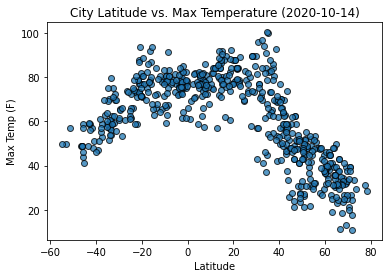

In [9]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Max Temp"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_temp.png")

### Latitude vs. Humidity Plot

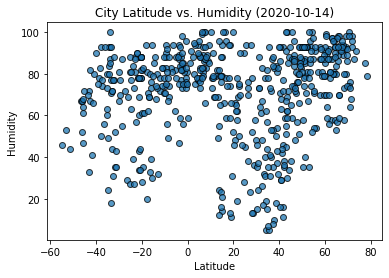

In [11]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Humidity"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_humidity.png")

### Latitude vs. Cloudiness Plot

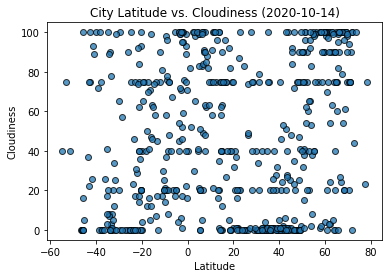

In [12]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Cloudiness"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_cloudiness.png")

### Latitude vs. Wind Speed Plot

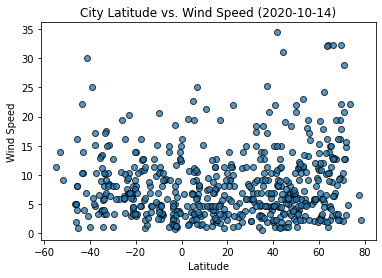

In [13]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Wind Speed"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_wind_speed.png")

## Linear Regression

### Write linear regression plot function (optional)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


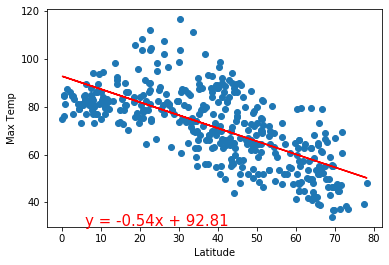

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


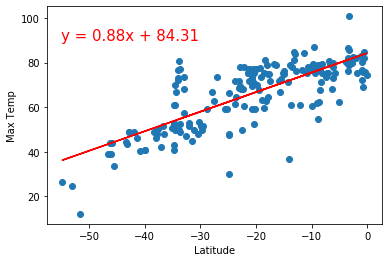

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


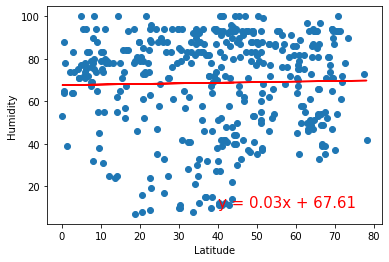

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


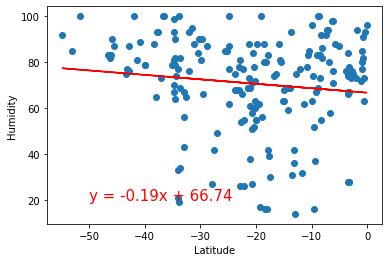

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


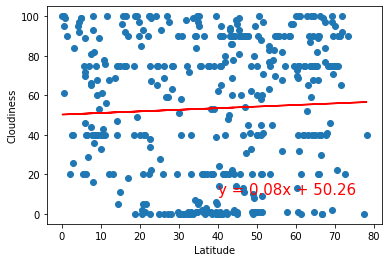

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


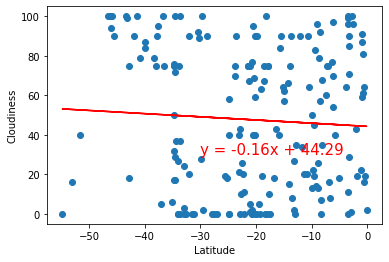

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


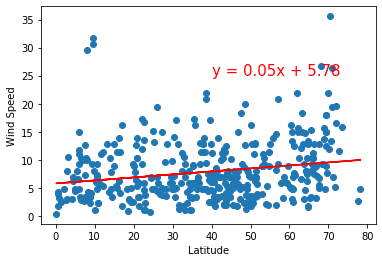

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


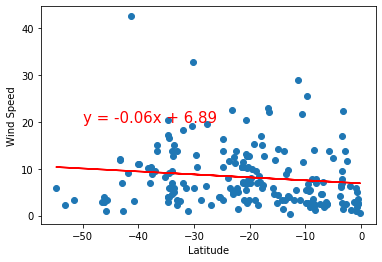